<a href="https://colab.research.google.com/github/Santhoshkumarra/Santhoshkumarra/blob/main/STOCK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [25]:
import pandas as pd
pd.read_csv('TSLA.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
1,2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300
2,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33471400
3,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
4,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
...,...,...,...,...,...,...,...
59,2022-06-09,748.020020,766.640015,717.979980,719.119995,719.119995,32163800
60,2022-06-10,705.469971,718.500000,683.739990,696.690002,696.690002,32512200
61,2022-06-13,669.500000,679.900024,644.049988,647.210022,647.210022,34255800
62,2022-06-14,654.859985,678.989990,635.210022,662.669983,662.669983,32662900


In [4]:
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-16,809.00000,842.000000,802.260010,840.229980,840.229980,28009600
1,2022-03-17,830.98999,875.000000,825.719971,871.599976,871.599976,22194300
2,2022-03-18,874.48999,907.849976,867.390015,905.390015,905.390015,33471400
3,2022-03-21,914.97998,942.849976,907.090027,921.159973,921.159973,27327200
4,2022-03-22,930.00000,997.859985,921.750000,993.979980,993.979980,35289500


In [34]:
start = dt.datetime(2022,3,1)
end = dt.datetime(2022,6,15)

<function matplotlib.pyplot.show>

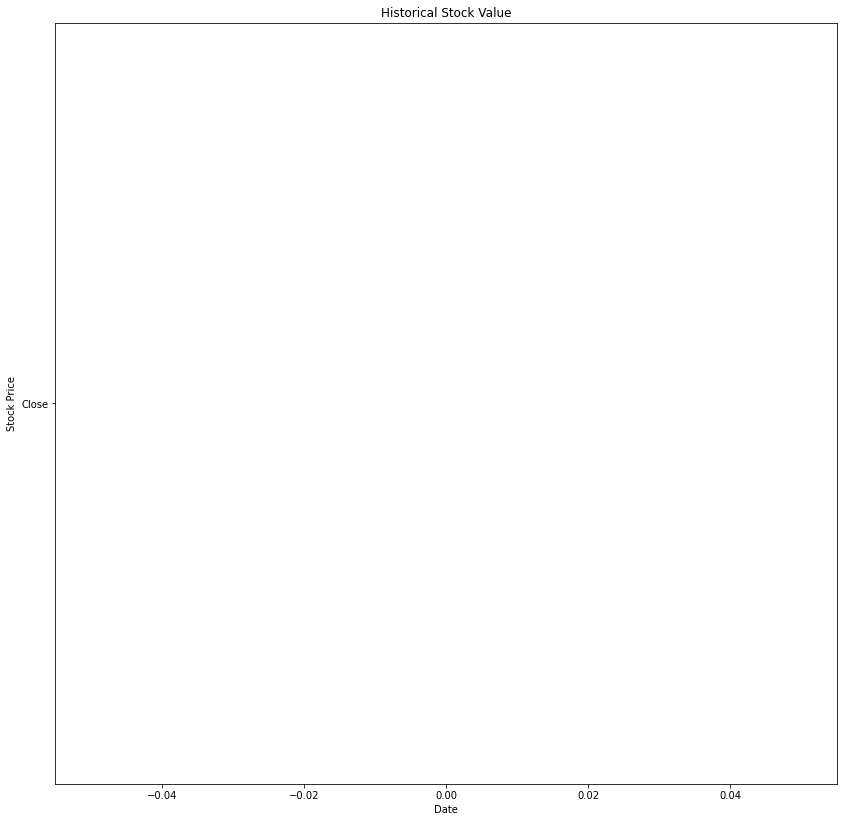

In [20]:
plt.figure(figsize=(14,14))
plt.plot(['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show

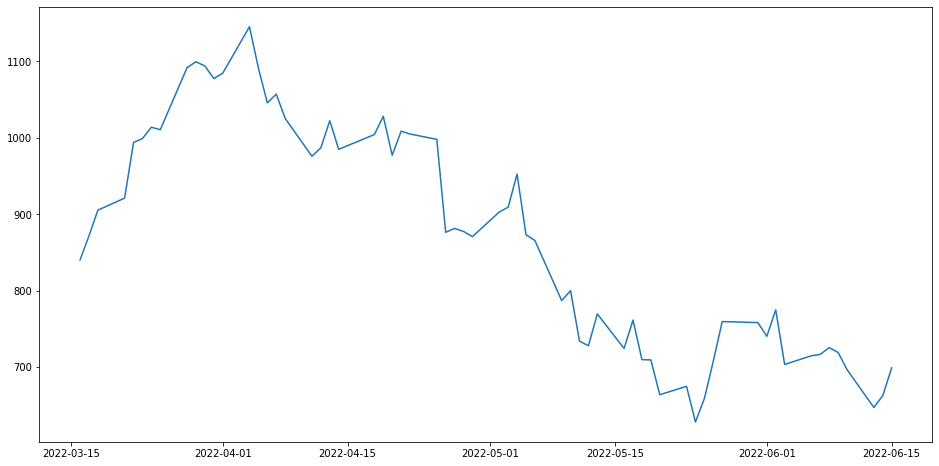

In [26]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
from keras.models import sequential
from keras.layers import Dense,Dropout, LSTM

In [27]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [28]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

TypeError: ignored

In [35]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

NameError: ignored

In [36]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

NameError: ignored

In [31]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

NameError: ignored